In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("Customer-Churn-Records.csv", sep=",")
#Traigo dataset
df.head()
#visualizamos las primeras cinco filas

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [34]:
df.shape
# muestra las columnas y filas del archivo

(10000, 18)

In [35]:
df["Card Type"].unique()
# muestra los valores únicos de la columna

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [36]:
df.describe()
# muestra estadísticas descriptivas de las columnas numéricas

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [37]:
df.describe(include='object')
# muestra estadísticas descriptivas de las columnas de tipo objeto

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [38]:
df_genero = df['Gender'].value_counts().reset_index()
# cuenta las personas por género
df_genero.columns = ['Genero', 'Cantidad']
# cambia los nombres de las columnas
df_genero

,Genero,Cantidad
0,Male,5457
1,Female,4543


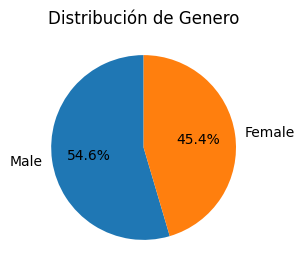

In [39]:
data = df_genero
plt.figure(figsize=(8,3))
plt.pie(data['Cantidad'], labels=data['Genero'], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Genero')
plt.show()
# Creación de gráfico que muestra la distribucion por género

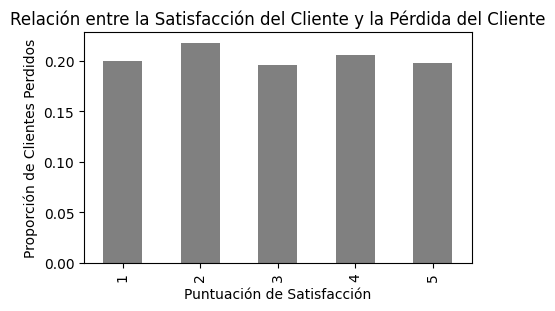

In [40]:
plt.figure(figsize=(5, 3))
# Indicando el tamaño deseado del gráfico
df.groupby('Satisfaction Score')['Exited'].mean().plot(kind='bar', color='Grey')
# Agrupamos dataframe "df" por Satisfaccion y por clientes perdidos. Se crea un grafico de barras basado en la agrupación creada.
plt.title('Relación entre la Satisfacción del Cliente y la Pérdida del Cliente')
# Titulo del gráfico
plt.xlabel('Puntuación de Satisfacción')
# Etiqueta del eje x
plt.ylabel('Proporción de Clientes Perdidos')
# Etiqueta del eje y
plt.show()

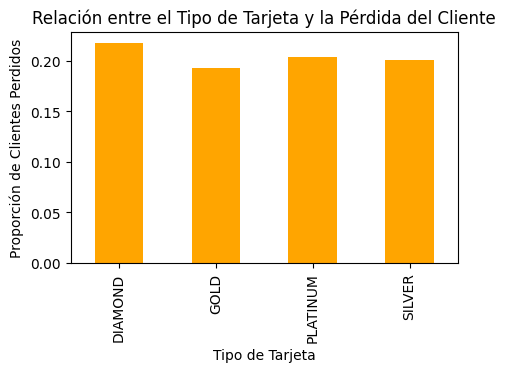

In [22]:
plt.figure(figsize=(5, 3))
# Indicando el tamaño deseado del gráfico
df.groupby('Card Type')['Exited'].mean().plot(kind='bar', color='orange')
# Agrupamos dataframe "df" por Tipo de tarjeta y por clientes perdidos. Se crea un grafico de barras basado en la agrupación creada.
plt.title('Relación entre el Tipo de Tarjeta y la Pérdida del Cliente')
# Titulo del gráfico
plt.xlabel('Tipo de Tarjeta')
# Etiqueta del eje x
plt.ylabel('Proporción de Clientes Perdidos')
# Etiqueta del eje y
plt.show()

<ipython-input-26-675fd67fc6eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Satisfaction Score', data=df, palette='pastel')


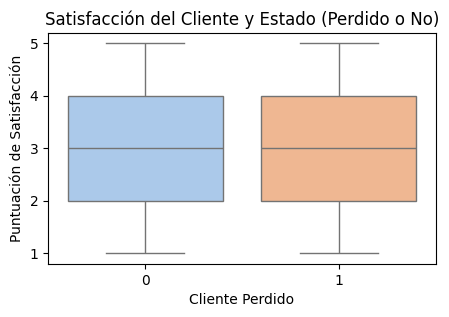

In [26]:
plt.figure(figsize=(5, 3))
# Indicando el tamaño deseado del gráfico
sns.boxplot(x='Exited', y='Satisfaction Score', data=df, palette='pastel')
# Se crea un gráfico de Boxplot donde nos muestra en el eje x los clientes perdidos y en el eje y la satisfaccion del cliente
plt.title('Satisfacción del Cliente y Estado (Perdido o No)')
# Titulo del gráfico
plt.xlabel('Cliente Perdido')
# Etiqueta del eje x
plt.ylabel('Puntuación de Satisfacción')
# Etiqueta del eje y
plt.show()

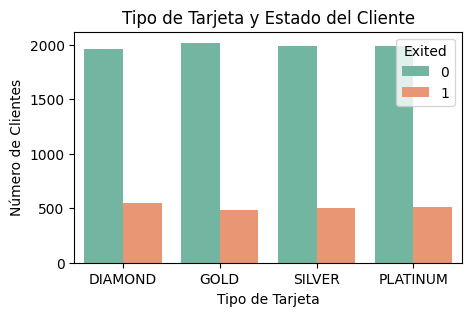

In [28]:
plt.figure(figsize=(5, 3))
# Indicando el tamaño deseado del gráfico
sns.countplot(x='Card Type', hue='Exited', data=df, palette='Set2')
# Se crea un gráfico de barras donde nos muestra en el eje x el tipo de tarjeta y en el eje y la cantidad de clientes perdidos
plt.title('Tipo de Tarjeta y Estado del Cliente')
# Titulo del gráfico
plt.xlabel('Tipo de Tarjeta')
# Etiqueta del eje x
plt.ylabel('Número de Clientes')
# Etiqueta del eje y
plt.show()

<ipython-input-42-7088b408e629>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Card Type', y='IsActiveMember', data=df, palette='Purples')


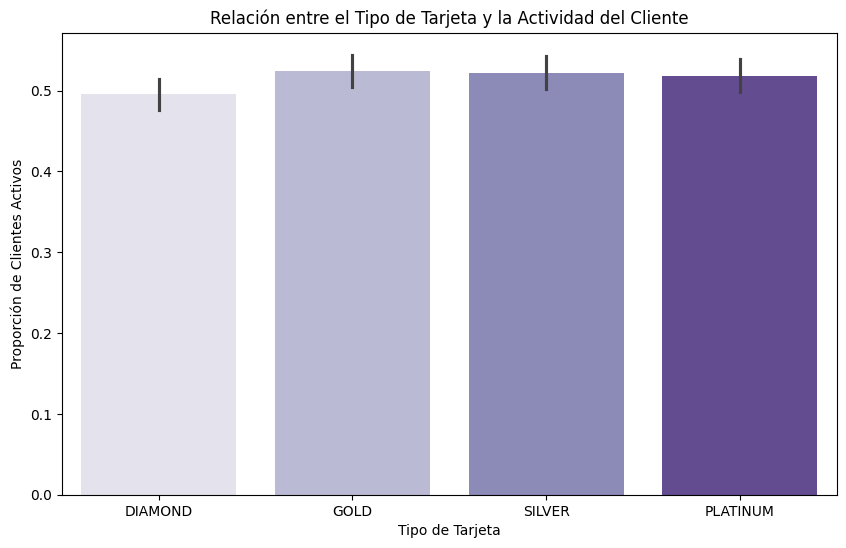

In [42]:
plt.figure(figsize=(10, 6))
# Indicando el tamaño deseado del gráfico
sns.barplot(x='Card Type', y='IsActiveMember', data=df, palette='Purples')
# Se crea un gráfico de barras donde nos muestra en el eje x el tipo de tarjeta y en el eje y la cantidad de clientes activos
plt.title('Relación entre el Tipo de Tarjeta y la Actividad del Cliente')
# Titulo del gráfico
plt.xlabel('Tipo de Tarjeta')
# Etiqueta del eje x
plt.ylabel('Proporción de Clientes Activos')
# Etiqueta del eje y
plt.show()

<Axes: title={'center': 'Saldo en Cuenta'}, xlabel='Balance'>

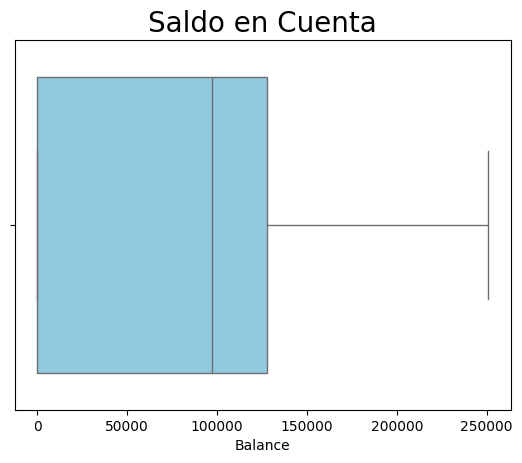

In [45]:
plt.title("Saldo en Cuenta", fontdict = {'fontsize': 20})
# Titulo del gráfico
sns.boxplot(x=df["Balance"], color='skyblue')